## Read Tables

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from astropy.io import ascii
from astropy.table import Table
from pipeline import *
from utils import *

# Datacube_C = Read_Datacube("/home/qliu/data/A2390C_cube.fits", name="A2390C", z0=0.228, 
#                          SE_catalog="./A2390C/SE_v2//A2390C_run2.cat")
# Datacube_C.generate_template(n_ratio=50, n_stddev=10, n_intp=2, sigma=4, ratio_range = (1., 8),
#                            temp_type="Ha-NII", ratio_prior="uniform", temp_model='gauss')
# Datacube_C.read_cc('./A2390C/A2390C-cc_Ha-NII_gauss_v4.fits')

# Datacube_E = Read_Datacube("/home/qliu/data/A2390F/A2390SE_cube_v2.fits", name="A390SE", z0=0.228, 
#                          SE_catalog="./A2390SE/SE_v2//A2390SE_run2.cat")
# Datacube_E.generate_template(n_ratio=50, n_stddev=10, n_intp=2, sigma=4, ratio_range = (1., 8),
#                            temp_type="Ha-NII", ratio_prior="uniform", temp_model='gauss')
# Datacube_E.read_cc('./A2390SE/A2390SE-cc_Ha-NII_gauss_v3.fits')

# Datacube_W = Read_Datacube("/home/qliu/data/A2390F/A2390NW_cube_v2.fits", name="A2390NW", z0=0.228, 
#                          SE_catalog="./A2390NW/SE_v2/A2390NW_run2.cat") 
# Datacube_W.generate_template(n_ratio=50, n_stddev=10, n_intp=2, sigma=4, ratio_range = (1., 8),
#                            temp_type="Ha-NII", ratio_prior="uniform", temp_model='gauss')
# Datacube_W.read_cc('./A2390NW/A2390NW-cc_Ha-NII_gauss_v3.fits')

dfE_all = pd.DataFrame({})
for i in range(10):
    dfE = pd.read_csv("./A2390SE/centroid_catalog/centroid_analysis_A2390SE_m2aper_all_weight_med_v8.%d.csv"%(i+1))
    dfE_all = pd.concat([dfE_all, dfE])
# ind_E = dfE_all.ID.unique()-1
# df_CC_E = pd.DataFrame({"ID":dfE_all.ID.unique(), "line_ratio":Datacube_E.line_ratio_best[ind_E]})
# dfE_all = pd.merge(dfE_all,df_CC_E) 
dfE_all.ID = dfE_all.ID.astype("str")+"E"

dfW_all = pd.DataFrame({})
for i in range(10):
    dfW = pd.read_csv("./A2390NW/centroid_catalog/centroid_analysis_A2390NW_m2aper_all_weight_med_v8.%d.csv"%(i+1))
    dfW_all = pd.concat([dfW_all, dfW])
# ind_W = dfW_all.ID.unique()-1
# df_CC_W = pd.DataFrame({"ID":dfW_all.ID.unique(), "line_ratio":Datacube_W.line_ratio_best[ind_W]})
# dfW_all = pd.merge(dfW_all,df_CC_W)    
dfW_all.ID = dfW_all.ID.astype("str")+"W"

dfC_all = pd.DataFrame({})
for i in range(10):
    dfC = pd.read_csv("./A2390C/centroid_catalog/centroid_analysis_A2390C_m2aper_all_weight_med_v8.%d.csv"%(i+1))
    dfC_all = pd.concat([dfC_all, dfC])
# ind_C = dfC_all.ID.unique()-1
# df_CC_C = pd.DataFrame({"ID":dfC_all.ID.unique(), "line_ratio":Datacube_C.line_ratio_best[ind_C]})
# dfC_all = pd.merge(dfC_all,df_CC_C)
dfC_all.ID = dfC_all.ID.astype("str")+"C"

Tab = pd.concat([dfC_all, dfE_all, dfW_all])
        
Tab_c = Tab[Tab.type=='c']
Tab_v = Tab[Tab.type=='v']

In [2]:
Tab_mc = Tab_c.sample(frac=0.1)
Tab_mc = Tab_mc[(Tab_mc.mag_auto<22.5)&(Tab_mc.mag_auto>18.5)]

In [3]:
Tab_v = Tab_v.reset_index(drop=True)
Tab_v

,ID,ra,dec,redshift,SNR_Ha,R_Ha,SNR_OIII,SNR_OII,mag_auto,R_petro,dist_edge,dist_cen,diff_centroid,diff_angle,PA_emission,cluster_center_angle,type
0,15C,328.437389,17.579927,0.250032,25.694893,7.454460,23.861609,24.682663,20.518691,5.94,8.027268,1342.107331,1.194609,86.288907,258.071281,344.360188,v
1,34C,328.396718,17.580286,0.634761,9.203464,6.175870,9.716381,9.626480,23.495175,5.94,20.008673,NaN,NaN,NaN,NaN,NaN,v
2,114C,328.485076,17.590044,0.230191,5.701308,1.791727,4.873084,4.961051,21.827195,5.28,59.486350,NaN,NaN,NaN,NaN,NaN,v
3,168C,328.437613,17.595225,0.628592,5.986842,5.064545,6.543574,6.797585,21.375922,6.60,184.529109,NaN,NaN,NaN,NaN,NaN,v
4,227C,328.329826,17.598383,0.240500,5.062968,6.680639,3.971485,4.135544,21.969056,5.28,199.965087,NaN,NaN,NaN,NaN,NaN,v
5,292C,328.393655,17.607061,0.249967,44.196249,3.233654,15.390942,16.512597,19.723507,5.28,137.691339,994.522068,0.303619,114.166178,251.835035,6.001212,v
6,336C,328.413625,17.609707,0.230917,19.402517,8.254181,15.584586,21.068785,21.316404,5.28,223.391717,965.621739,1.602522,108.444793,245.090395,353.535188,v
7,387C,328.321084,17.613287,0.644522,2.261333,1.160693,5.011359,5.710960,22.552551,5.94,175.096724,NaN,NaN,NaN,NaN,NaN,v
8,388C,328.458421,17.617898,0.225830,16.596631,1.754968,4.287354,4.401964,19.285750,5.28,208.210774,1047.182788,1.361719,152.065069,173.918513,325.983582,v
9,410C,328.455016,17.622025,0.226227,29.531126,2.098515,8.904915,9.157651,18.871652,5.28,219.377713,988.658869,0.885341,10.864977,315.364363,326.229340,v


In [11]:
Cat_v = Tab_v.groupby("ID").median()
Cat_v.index

Index(['1028E', '1029E', '1057W', '1062W', '1080C', '10E', '1107E', '1110C',
       '1126E', '1131W',
       ...
       '923W', '928C', '929C', '944W', '946C', '960W', '961C', '965C', '973C',
       '988E'],
      dtype='object', name='ID', length=205)

In [338]:
match_1 = np.array([],dtype="int64")
match_2 = np.array([],dtype="int64")
Cat_v = Tab_v.groupby("ID",sort=False).median()
for i in Cat_v.index[:len(Cat_v)//2+1]:
    Coords_v = SkyCoord(Cat_v.drop([i]).ra, Cat_v.drop([i]).dec, frame='icrs', unit="deg")
    coord = SkyCoord(Cat_v.ra[i], Cat_v.dec[i], frame='icrs', unit="deg")
    # Match two catalogs
    idx, d2d, d3d = coord.match_to_catalog_sky(Coords_v)
    
    if d2d < 2 * u.arcsec:
        print("Obj idx: %s   Matched idx: %s"%(i, Cat_v.index[np.int(idx+1)]))
        match_1 = np.append(match_1, i)
        match_2 = np.append(match_2, Cat_v.index[np.int(idx+1)])

# Delete repeated detections with smaller S/N
Tab_d = Tab_v.copy()
for m1, m2 in zip(match_1, match_2):
    m = m1 if Cat_v.SNR_Ha.values[Cat_v.index==m1]<Cat_v.SNR_Ha.values[Cat_v.index==m2] else m2
    print("Drop %s"%m)
    Tab_d = Tab_d[Tab_d.ID!=m]
Tab_n = Tab_d.copy()
Tab_n = Tab_n[Tab_n.ID!="1936C"] #BCG
Tab_n = Tab_n[Tab_n.ID!="1735C"] #outflow
Tab_n = Tab_n[Tab_n.ID!="1742C"]
Tab_n = Tab_n[Tab_n.ID!="2222C"] #SII
Tab_n = Tab_n[Tab_n.ID!="516E"] 
Tab_n = Tab_n[Tab_n.ID!="535E"]

#dubious candidate 
for name in ["114C","227C","593C","672C","817C","965C","1296C",
             "56E","66E","156E","1107E"
             "189W","196W","289W","519W"]:
    Tab_n = Tab_n[Tab_n.ID!=name]

Obj idx: 15C   Matched idx: 1329E
Obj idx: 168C   Matched idx: 1149E
Obj idx: 336C   Matched idx: 1029E
Obj idx: 410C   Matched idx: 1770E
Obj idx: 445C   Matched idx: 1717E
Obj idx: 1285C   Matched idx: 196W
Obj idx: 1396C   Matched idx: 77W
Obj idx: 1404C   Matched idx: 79W
Obj idx: 1445C   Matched idx: 122W
Obj idx: 2207C   Matched idx: 189W
Drop 15C
Drop 168C
Drop 1029E
Drop 1770E
Drop 1717E
Drop 196W
Drop 77W
Drop 79W
Drop 122W
Drop 189W


## Sample Cut and Analysis

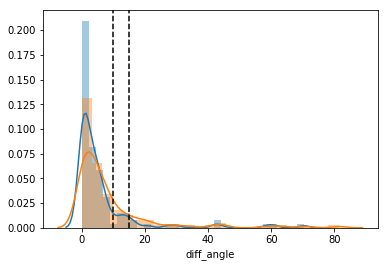

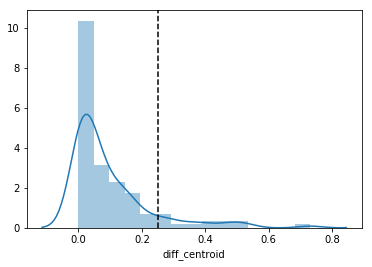

         ID          ra        dec  redshift     SNR_Ha      R_Ha   SNR_OIII  \
6      336C  328.413625  17.609707  0.230917  19.402517  8.254181  15.584586   
8      388C  328.458421  17.617898  0.225830  16.596631  1.754968   4.287354   
9      410C  328.455016  17.622025  0.226227  29.531126  2.098515   8.904915   
11     482C  328.392651  17.622805  0.224574  10.474053  2.284038   6.203257   
16     602C  328.311578  17.634871  0.226227  86.025975  2.152281   9.046484   
18     621C  328.479545  17.637149  0.229399  16.574321  6.373965  12.107308   
20     657C  328.452914  17.639550  0.229331  12.905119  2.945319   5.492265   
21     669C  328.367534  17.638939  0.237725  20.041881  4.649274  14.367952   
24     709C  328.308873  17.640930  0.219168   7.173265  1.000000   6.201797   
28     859C  328.364305  17.655359  0.224970   7.442745  2.774370   6.019051   
29     909C  328.377029  17.659876  0.242415   7.900638  8.390818   7.466237   
31     929C  328.471330  17.662573  0.22

In [479]:
Tab_m = Tab_n[abs(Tab_n.redshift-0.228)<0.015] # redshift
cond = (Tab_m.mag_auto<25) & (Tab_m.mag_auto>17) \
        &(Tab_m.dist_edge>20) & (Tab_m.diff_centroid>0)&(Tab_m.diff_centroid<10)
Tab_m = Tab_m[cond]

gp = Tab_m.groupby("ID", sort=False)
d_angles_v = gp.diff_angle

interval_angle = d_angles_v.quantile(0.75)-d_angles_v.quantile(0.25)
sigma_angle = d_angles_v.quantile(0.84)-d_angles_v.quantile(0.16)
stddev_angle = d_angles_v.std()

d_centroids_v = gp.diff_centroid
interval_offset = d_centroids_v.quantile(0.75)-d_centroids_v.quantile(0.25)

sns.distplot(interval_angle)
sns.distplot(sigma_angle)
plt.axvline(10, color="k",ls="--")
plt.axvline(15, color="k",ls="--")
plt.show()
sns.distplot(interval_offset)
plt.axvline(0.25, color="k",ls="--")
plt.show()

rob_cond = ~np.isnan(stddev_angle) & (interval_angle<10) #& (interval_offset<0.25)
# rob_cond = ~np.isnan(stddev_angle) & (sigma_angle<15) #& (interval_angle<10) #& (interval_offset<0.25)

Tab_m_all = Tab_m.copy()

for id in interval_angle.keys()[~rob_cond]:
    Tab_m = Tab_m[Tab_m.ID!=id]

Tab_m_HaR = Tab_m[(Tab_m.SNR_Ha>Tab_m.SNR_OII) & (Tab_m.R_Ha<7)]
Tab_m_Ha = Tab_m[Tab_m.SNR_Ha>Tab_m.SNR_OII]

# d_centroid_v = Tab.diff_centroid.median()
# d_angle_v = Tab.diff_angle.median()
print(Tab_m)

In [353]:
d_angle_v

81.65349735368052

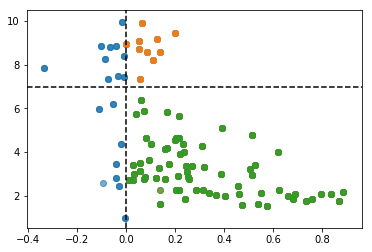

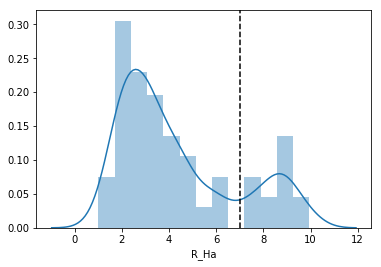

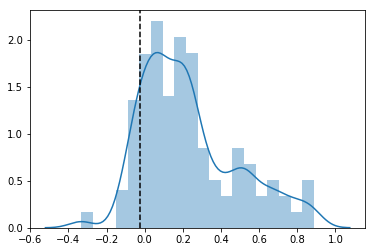

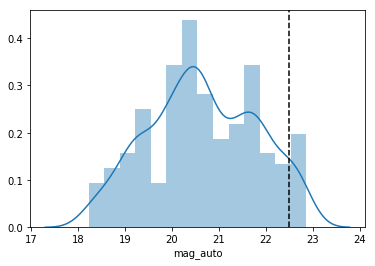

In [480]:
plt.scatter((Tab_m.SNR_Ha-Tab_m.SNR_OII)/Tab_m.SNR_Ha,Tab_m.R_Ha, alpha=0.2)
plt.scatter((Tab_m_Ha.SNR_Ha-Tab_m_Ha.SNR_OII)/Tab_m_Ha.SNR_Ha,Tab_m_Ha.R_Ha, alpha=0.2)
plt.scatter((Tab_m_HaR.SNR_Ha-Tab_m_HaR.SNR_OII)/Tab_m_HaR.SNR_Ha,Tab_m_HaR.R_Ha, alpha=0.2)
plt.axhline(7, ls="--", color="k")
plt.axvline(0, ls="--", color="k")
plt.show()
sns.distplot(Tab_m.R_Ha)
plt.axvline(7, ls="--", color="k")
plt.show()
sns.distplot((Tab_m.SNR_Ha-Tab_m.SNR_OII)/Tab_m.SNR_Ha)
plt.axvline(1-10**0.01, ls="--", color="k")
plt.show()
sns.distplot(Tab_m.mag_auto)
plt.axvline(22.5, ls="--", color="k")
plt.show()

## APER A2390C + A2390E + A2390W

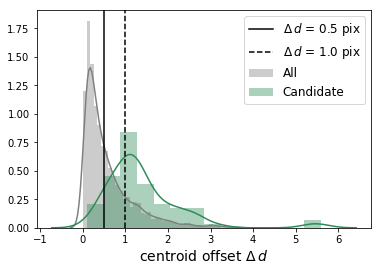

In [68]:
draw_centroid_offset(d_centroid_v, d_centroid_c,crit=[0.5,1])
# plt.savefig("/home/qliu/Pictures/20190312/offset_A2390C+W+E.pdf",dpi=100)

# of offset > 50 pix :49
# of offset > 100 pix :29


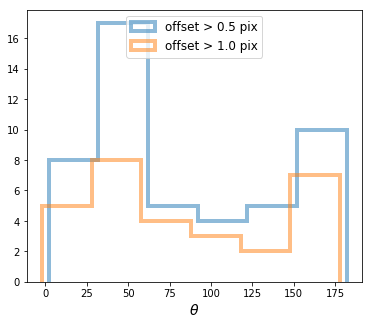

In [234]:
# m2 aper med weight
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v, d_centroid_v,d_centroid_c, crit=[.5, 1.], b=7)

In [495]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
distance_cluster = cosmo.angular_diameter_distance(z=0.228)
print(distance_cluster)
len_1arc = distance_cluster*u.arcsec.to(u.rad)
len_pix = len_1arc * 0.322  #pixel length in Mpc

velocity_dispersion = 1100 * u.km/u.s
v_vir = velocity_dispersion.value
# v_vir_los = v_vir/np.sqrt(3) # los vel dispersion
R_vir = 1.51/0.7  # Mpc
print(R_vir, v_vir)
l = (len_pix/R_vir).value # pixel length in R200 1 pix = l R_vir

len_pix

752.8932528699639 Mpc
2.1571428571428575 1100.0


<Quantity 0.00117534 Mpc>

In [497]:
len_pix.to(u.kpc)

<Quantity 0.85081641 1 / kpc>

In [499]:
def draw_phase_diagram(Table, r1=1., v1=1., r2=2., v2 = 3., z0=0.228, ax=None):
    gp = Table.groupby("ID", sort=False)   
    
    R_norm = gp.dist_cen.median()*l  # normed R in R200
    v_norm = abs(gp.redshift.median()-z0)*3e5/v_vir # normed R in v_vir (sigma_vir)
    mag = gp.mag_auto.median()
    
    d_centroid_v = gp.diff_centroid.median()
    d_angle_v = gp.diff_angle.median()
    in_cluster = (((R_norm/r2)**2 + (v_norm/v2)**2) < 1.)  #circle
    in_cluster = ((v_norm/v1) < 1.5*(R_norm/r1)**(-0.5))   # inv-square dash
    sigma_v = Sigma_vir(R_vir=1*u.Mpc, M_vir=1e15*c.M_sun)
    vv = V_esc(R_norm*R_vir*u.Mpc, R_vir=1*u.Mpc, M_vir=1e15*c.M_sun, C=6)
#     in_cluster = ((v_norm/v1) < (vv/sigma_v).value)
    
    cond1 =  (d_centroid_v>0.85)&(d_angle_v<90) & in_cluster
    cond2 = (d_centroid_v>0.85)&(d_angle_v>90) & in_cluster
    cond1b =  (d_centroid_v>0.5)&(d_centroid_v<0.85)&(d_angle_v<90) & in_cluster
    cond2b = (d_centroid_v>0.5)&(d_centroid_v<0.85)&(d_angle_v>90) & in_cluster
    cond1c =  (d_centroid_v>0)&(d_centroid_v<.5)&(d_angle_v<90) & in_cluster
    cond2c = (d_centroid_v>0)&(d_centroid_v<.5)&(d_angle_v>90) & in_cluster
    
    from matplotlib.patches import Ellipse
    if ax is None:
        plt.figure(figsize=(11,9))
        ax = plt.subplot(111)
    plt.scatter(R_norm[cond2], v_norm[cond2], s=250, color="firebrick",
                edgecolor="none",alpha=0.8,zorder=3,label="$\Delta\,d>1$ pix , $\\theta>90^\circ$")
    plt.scatter(R_norm[cond1], v_norm[cond1], s=250, color="steelblue",
                edgecolor="none",alpha=0.8,zorder=3,label="$\Delta\,d>1$ pix , $\\theta<90^\circ$")
    plt.scatter(R_norm[cond1b], v_norm[cond1b], s=150, 
                facecolor="None",color="skyblue",lw=4,
                alpha=0.7,zorder=4,label="$\Delta\,d > 0.5$ pix , $\\theta<90^\circ$")
    plt.scatter(R_norm[cond2b], v_norm[cond2b], s=150, 
                facecolor="None",color="orange",lw=4,
                alpha=0.7,zorder=4,label="$\Delta\,d > 0.5$ pix , $\\theta>90^\circ$")
    plt.scatter(R_norm[cond1c], v_norm[cond1c], s=100, marker="s", 
                facecolor="None",color="skyblue",lw=3,
                alpha=0.7,zorder=4,label="$\Delta\,d < 0.5$ pix , $\\theta<90^\circ$")
    plt.scatter(R_norm[cond2c], v_norm[cond2c], s=100, marker="s", 
                facecolor="None",color="orange",lw=3,
                alpha=0.7,zorder=4,label="$\Delta\,d < 0.5$ pix , $\\theta>90^\circ$")
    
    non_virial = (((R_norm/r1)**2 + (v_norm/v1)**2) > 1.) & (((R_norm/r2)**2 + (v_norm/v2)**2) < 1.)
    virial = (((R_norm/r1)**2 + (v_norm/v1)**2) < 1.)
    inner = ((R_norm/r1)**2 < 1.) & in_cluster
    outer = ((R_norm/r1)**2 > 1.) &  in_cluster   
    
    condA = non_virial & (R_norm<1) 
    condB = virial  
    condC = non_virial & (R_norm>1)   

    condA1, condA1b = condA&cond1, condA&cond1b 
    condB1, condB1b = condB&cond1, condB&cond1b 
    condC1, condC1b = condC&cond1, condC&cond1b 
    condA2, condA2b = condA&cond2, condA&cond2b 
    condB2, condB2b = condB&cond2, condB&cond2b 
    condC2, condC2b = condC&cond2, condC&cond2b 
    plt.text(0.05, 0.84,r"$\bf A$",color="k",va="center",fontsize=25,transform=ax.transAxes)
    plt.text(0.05, 0.22,r"$\bf B$",color="k",va="center",fontsize=25,transform=ax.transAxes)
    plt.text(0.85, 0.1,r"$\bf C$",color="k",va="center",fontsize=25,transform=ax.transAxes)
    
    ft = 22
    plt.text(0.62, 0.94,"A :",color="k",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.62, 0.86,"B :",color="k",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.62, 0.78,"C :",color="k",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.7, 0.94,"%d"%(np.sum(condA1)),color="steelblue",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.7, 0.86,"%d"%(np.sum(condB1)),color="steelblue",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.7, 0.78,"%d"%(np.sum(condC1)),color="steelblue",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.86, 0.94,"%d"%(np.sum(condA2)),color="firebrick",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.86, 0.86,"%d"%(np.sum(condB2)),color="firebrick",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.86, 0.78,"%d"%(np.sum(condC2)),color="firebrick",va="center",fontsize=ft,transform=ax.transAxes)
    plt.text(0.74, 0.942,"(%d)"%(np.sum(condA1b)),color="steelblue",va="center",fontsize=ft-4,transform=ax.transAxes)
    plt.text(0.74, 0.862,"(%d)"%(np.sum(condB1b)),color="steelblue",va="center",fontsize=ft-4,transform=ax.transAxes)
    plt.text(0.74, 0.782,"(%d)"%(np.sum(condC1b)),color="steelblue",va="center",fontsize=ft-4,transform=ax.transAxes)
    plt.text(0.9, 0.942,"(%d)"%(np.sum(condA2b)),color="firebrick",va="center",fontsize=ft-4,transform=ax.transAxes)
    plt.text(0.9, 0.862,"(%d)"%(np.sum(condB2b)),color="firebrick",va="center",fontsize=ft-4,transform=ax.transAxes)
    plt.text(0.9, 0.782,"(%d)"%(np.sum(condC2b)),color="firebrick",va="center",fontsize=ft-4,transform=ax.transAxes)

    ellipse1 = Ellipse(xy=(0,0), width=2*r1, height=2*v1, 
                      edgecolor='gray', fc='gray', lw=3, alpha=0.4,zorder=2)
    ellipse2 = Ellipse(xy=(0,0), width=2*r2, height=2*v2, 
                      edgecolor='gray', fc='gray', lw=3, alpha=0.2,zorder=1)
    ax.add_patch(ellipse1)
    ax.add_patch(ellipse2)
    
    plt.vlines(1, ymin=0.2, ymax=1.8,color="gray",linestyle="--", alpha=0.7, lw=3)

    plt.xlim(-0.005, r2+0.05)
    plt.ylim(-0.005, v2+0.1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("r / R$_{200}$",fontsize=15)
    plt.ylabel("|v$_{los}$ - v$_0$| / $\sigma_{vir}$",fontsize=15)
#     plt.legend(loc=9,fontsize=14)
    plt.tight_layout()
    return (virial, non_virial, inner, outer)

### Weighted emission (Med Continuum)

2073.8652969925442 km / s


(0, 4.0)

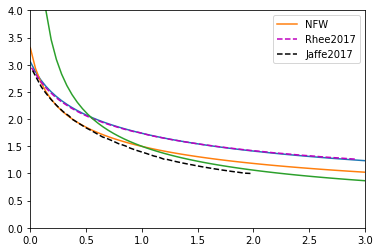

In [465]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import astropy.constants as c
import galpy
from galpy.potential import NFWPotential, plotEscapecurve, vesc

NP= NFWPotential(conc=2.58, mvir=2e3, ro=1*u.Mpc, vo=1*u.km/u.s)
# plotEscapecurve(NP, Rrange=[0., 4*u.Mpc])
# print(vesc(NP,1.*u.Mpc))
# R_grid = np.linspace(0.01,2,100)*R_vir
# V_esc_grid = np.array([vesc(NP,r*u.Mpc).value/v_vir for r in R_grid])
# plt.plot(R_grid*1000, V_esc_grid*v_vir,ls="--")
# plt.show()

def V_esc(R, R_vir=1.55*u.Mpc, M_vir=1e14*c.M_sun, C=6):
    s = R/R_vir
    v_esc = np.sqrt(2*c.G*M_vir*K(s,C)/R_vir).to(u.km/u.s)
    return v_esc
    
def K(s,C=6):
    return g_c(C)*np.log(1+C*s)/s

def g_c(C):
    return 1./(np.log(1+C)-C/(1+C))

def Sigma_vir(R_vir, M_vir):
    return np.sqrt(c.G*M_vir/R_vir).to(u.km/u.s)

import pandas as pd
df = pd.read_csv("/home/qliu/Downloads/Rhee2017.csv",header=None)
r_Rhee, v_Rhee = df.iloc[:,0], df.iloc[:,1]

df = pd.read_csv("/home/qliu/Downloads/Jaffe2018.csv",header=None)
r_Jaffe, v_Jaffe = df.iloc[:,0], df.iloc[:,1]

rr = np.linspace(0.001,10,100) *u.Mpc

R_3d_vir = 1*u.Mpc
sigma_v = Sigma_vir(R_vir=R_3d_vir, M_vir=1e15*c.M_sun)
print(sigma_v)
vv = V_esc(rr, R_vir=R_3d_vir, M_vir=1e15*c.M_sun, C=2.8)
plt.plot(rr/R_vir, vv/sigma_v)  # cylinder R_3D->R
vv = V_esc(rr, R_vir=R_3d_vir, M_vir=1e15*c.M_sun, C=6)
plt.plot(rr/R_vir, vv/sigma_v,label="NFW")  # cylinder R_3D->R
plt.plot(r_Rhee, v_Rhee, color="m",ls="--",label="Rhee2017")
plt.plot(r_Jaffe, v_Jaffe, color="k",ls="--",label="Jaffe2017")
plt.plot(rr/R_vir, 1.5*(rr/R_vir)**(-0.5))
plt.legend()
plt.xlim(0,3.)
plt.ylim(0,4.)

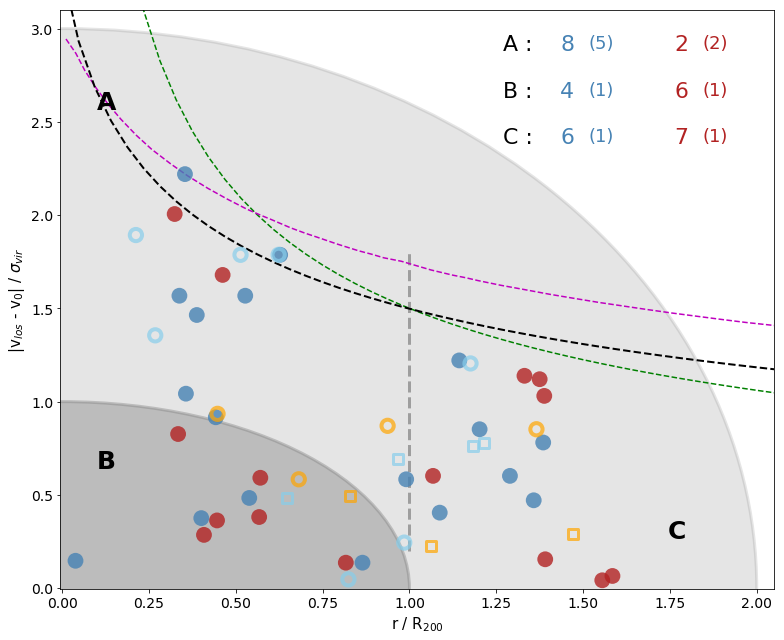

In [500]:
# weight new CC
(virial, non_virial, inner, outer) = draw_phase_diagram(Table=Tab_m_Ha)
# plt.plot(R_grid/R_vir, V_esc_grid/np.sqrt(3))
plt.plot(rr/R_vir, 1.5*(rr/R_vir)**(-0.5),color="g",ls="--")
plt.plot(r_Rhee, v_Rhee, color="m",ls="--",label="Rhee2017")
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=2,ls="--")
# plt.savefig("/home/qliu/Pictures/report/A2390_ELG_Phase_v7.pdf")

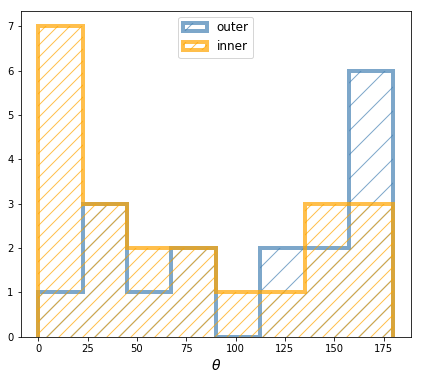

In [9]:
plt.figure(figsize=(7,6))

b=9
plt.hist(d_angle_v[(d_centroid_v>1)&outer], bins=np.linspace(0,180,b), color="steelblue", hatch="/",
         normed=False, histtype="step", linewidth=4, alpha=0.7, label="outer")
plt.hist(d_angle_v[(d_centroid_v>1)&inner], bins=np.linspace(0,180,b), color="orange",hatch="//",
         normed=False, histtype="step", linewidth=4, alpha=0.7, label="inner")
plt.xlabel("$\\theta$",fontsize=14)
plt.legend(loc=9,fontsize=12)

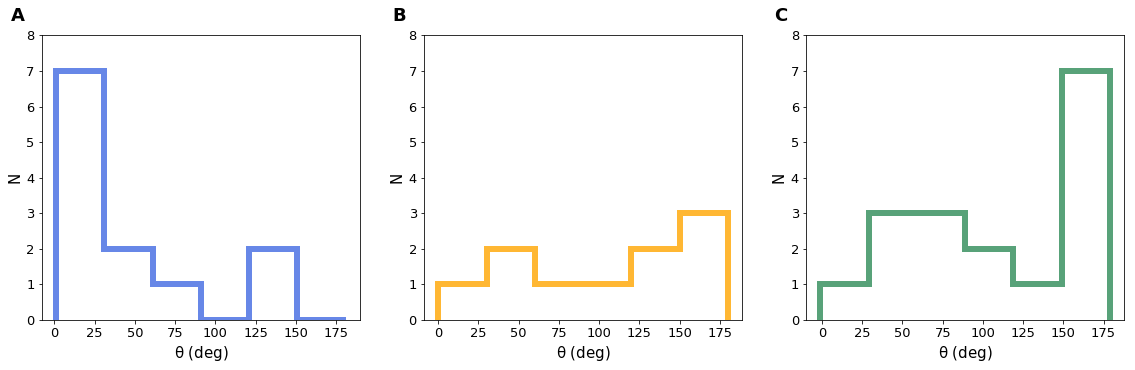

In [179]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,nrows=1,figsize=(16,5))

b=7
ax1.hist(d_angle_v[(d_centroid_v>1)&non_virial&inner]+1, bins=np.linspace(0,180,b)+1, color="royalblue",hatch="",
         normed=False, histtype="step", linewidth=6, alpha=0.8, label="A")
ax2.hist(d_angle_v[(d_centroid_v>1)&virial], bins=np.linspace(0,180,b), color="orange", hatch="",
         normed=False, histtype="step", linewidth=6, alpha=0.8, label="B")
ax3.hist(d_angle_v[(d_centroid_v>1)&outer]-1, bins=np.linspace(0,180,b)-1, color="seagreen", hatch="",
         normed=False, histtype="step", linewidth=6, alpha=0.8, label="C")

for ax,r in zip((ax1,ax2,ax3),("A","B","C")):
    ax.set_xlabel(r"$\rm \theta$ (deg)",fontsize=15)
    ax.set_ylabel("N",fontsize=15)
    ax.set_ylim(0,8)
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.text(-0.1,1.05,r"$\bf %s$"%r,fontsize=18,transform=ax.transAxes)
# plt.legend(loc=9,fontsize=12)
plt.subplots_adjust(left=0.04,right=0.98,top=0.9,bottom=0.11)
# plt.savefig("/home/qliu/Pictures/hist_reg.pdf")

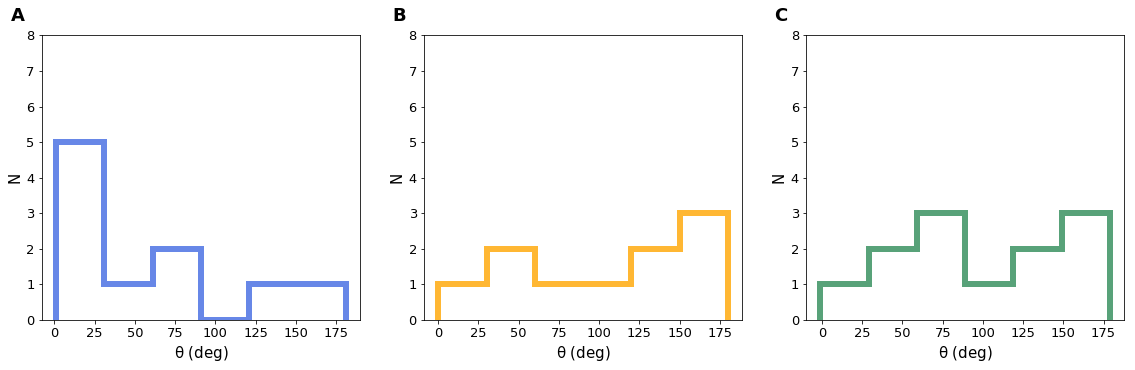

In [501]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,nrows=1,figsize=(16,5))

b=7
ax1.hist(d_angle_v[(d_centroid_v>1)&non_virial&inner]+1, bins=np.linspace(0,180,b)+1, color="royalblue",hatch="",
         normed=False, histtype="step", linewidth=6, alpha=0.8, label="A")
ax2.hist(d_angle_v[(d_centroid_v>1)&virial], bins=np.linspace(0,180,b), color="orange", hatch="",
         normed=False, histtype="step", linewidth=6, alpha=0.8, label="B")
ax3.hist(d_angle_v[(d_centroid_v>1)&outer]-1, bins=np.linspace(0,180,b)-1, color="seagreen", hatch="",
         normed=False, histtype="step", linewidth=6, alpha=0.8, label="C")

for ax,r in zip((ax1,ax2,ax3),("A","B","C")):
    ax.set_xlabel(r"$\rm \theta$ (deg)",fontsize=15)
    ax.set_ylabel("N",fontsize=15)
    ax.set_ylim(0,8)
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.text(-0.1,1.05,r"$\bf %s$"%r,fontsize=18,transform=ax.transAxes)
# plt.legend(loc=9,fontsize=12)
plt.subplots_adjust(left=0.04,right=0.98,top=0.9,bottom=0.11)
# plt.savefig("/home/qliu/Pictures/hist_reg.pdf")

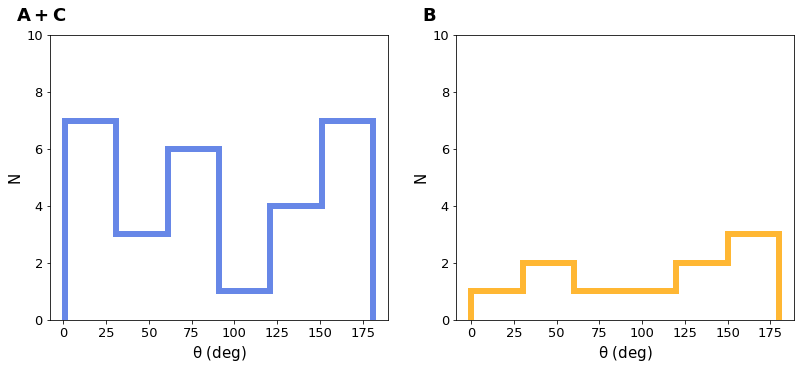

In [387]:
fig,(ax1,ax2)=plt.subplots(ncols=2,nrows=1,figsize=(11,5))

b=7
ax1.hist(d_angle_v[(d_centroid_v>1)&((non_virial&inner)|(outer))]+1, bins=np.linspace(0,180,b)+1, color="royalblue",hatch="",
         normed=False, histtype="step", linewidth=6, alpha=0.8, label="A")
ax2.hist(d_angle_v[(d_centroid_v>1)&virial], bins=np.linspace(0,180,b), color="orange", hatch="",
         normed=False, histtype="step", linewidth=6, alpha=0.8, label="B")

for ax,r in zip((ax1,ax2),("A+C","B")):
    ax.set_xlabel(r"$\rm \theta$ (deg)",fontsize=15)
    ax.set_ylabel("N",fontsize=15)
    ax.set_ylim(0,10)
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.text(-0.1,1.05,r"$\bf %s$"%r,fontsize=18,transform=ax.transAxes)
# plt.legend(loc=9,fontsize=12)
plt.subplots_adjust(left=0.04,right=0.98,top=0.9,bottom=0.11)
# plt.savefig("/home/qliu/Pictures/hist_reg-inv2_AB.png",dpi=150)

In [195]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
# m2APER A2390C + A2390E + A2390W MED
p = 0.5
q = 1.
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[(d_centroid_v>p)&outer], d_angle_c).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(d_angle_v[(d_centroid_v>q)&outer], d_angle_c).pvalue)

print(anderson_ksamp([d_angle_v[(d_centroid_v>p)&outer],d_angle_c]))
print(anderson_ksamp([d_angle_v[(d_centroid_v>q)&outer],d_angle_c]))

In [335]:
hdu_field = fits.open("/home/qliu/data/A2390deep_bgsub.fits")[0]
wcs = WCS(hdu_field.header)
stack_field = hdu_field.data
yy,xx = np.indices(stack_field.shape)+1

pos_image = np.indices(stack_field.shape)
Coords_world = wcs.all_pix2world(pos_image[0].ravel(), pos_image[1].ravel(), 1)
edge=(pos_image[0].ravel()==0)|(pos_image[1].ravel()==0)|(pos_image[0].ravel()==2063)|(pos_image[1].ravel()==2047)

hdu_field_W = fits.open("/home/qliu/data/A2390F/A2390NW_stack_v2.fits")[0]
hdu_field_E = fits.open("/home/qliu/data/A2390F/A2390SE_stack_v2.fits")[0]
wcs_W = WCS(hdu_field_W.header)
wcs_E = WCS(hdu_field_E.header)
Coords_world_W = wcs_W.all_pix2world(pos_image[0].ravel(), pos_image[1].ravel(), 1)
Coords_world_E = wcs_E.all_pix2world(pos_image[0].ravel(), pos_image[1].ravel(), 1)

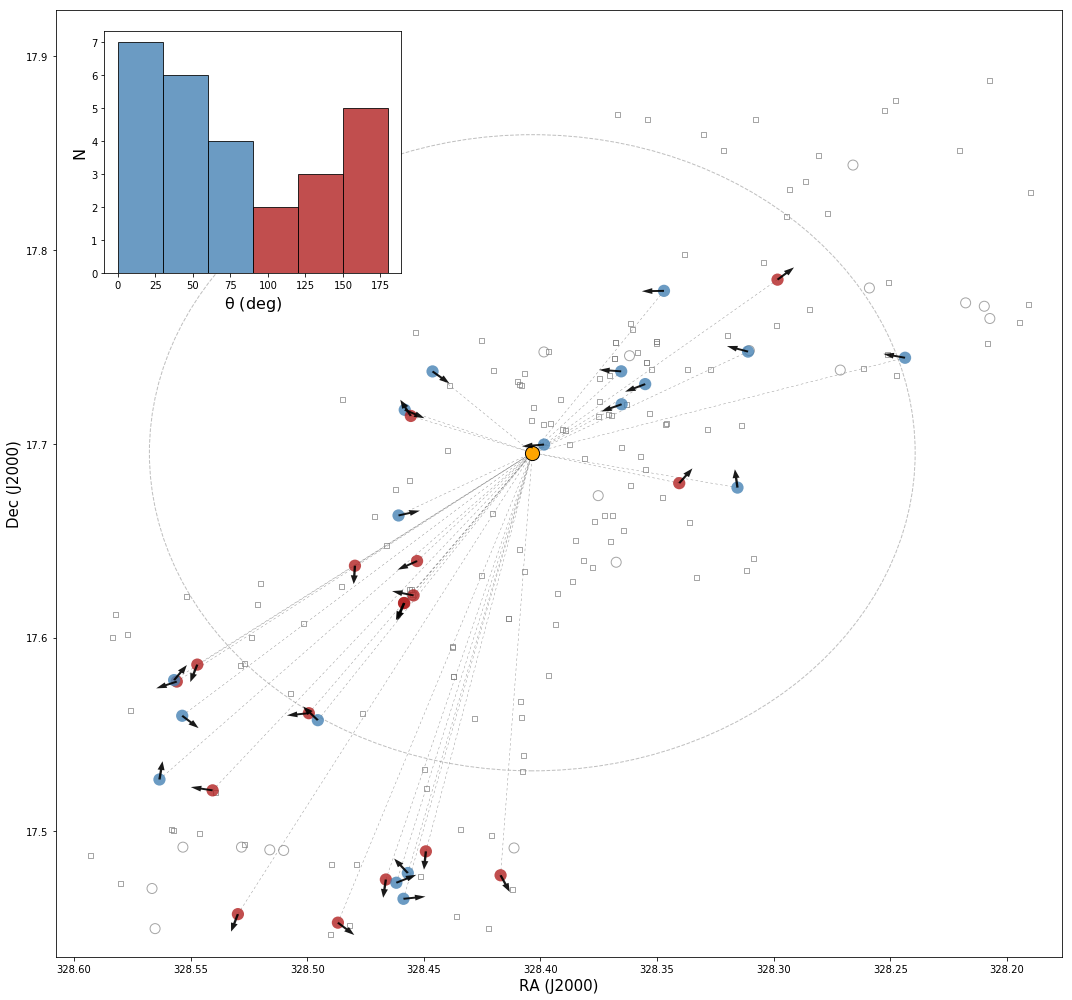

In [13]:
fig, ax = plt.subplots(figsize=(15,14))
# ax.set_facecolor('whitesmoke')
ax.set_xlim(Coords_world_E[0].max() + 0.01, Coords_world_W[0].min() - 0.01)
ax.set_ylim(Coords_world_E[1].min() - 0.01, Coords_world_W[1].max() + 0.01)
plt.xlabel("RA (J2000)", fontsize=15)
plt.ylabel("Dec (J2000)", fontsize=15)

coord_BCG = (328.40351201,17.69544013)

gp_v = Tab_v.groupby("ID", sort=False)
gp_ma = Tab_ma.groupby("ID", sort=False)

plt.scatter(coord_BCG[0], coord_BCG[1], s=200, edgecolor="k", color="orange",alpha=1,zorder=2)
# plt.scatter(Coords_world[0][edge][::5],Coords_world[1][edge][::5],s=0.02,color="k")
# plt.scatter(Coords_world_W[0][edge][::5],Coords_world_W[1][edge][::5],s=0.02,color="k")
# plt.scatter(Coords_world_E[0][edge][::5],Coords_world_E[1][edge][::5],s=0.02,color="k")

circle = plt.Circle(coord_BCG, R_vir/len_pix.value*0.322/3600, color='gray', ls="--", lw=1., alpha=0.5, fill=False)
ax.add_artist(circle)
for num, x, y, pa, theta, offset in zip(pd.unique(Tab_v.ID), gp_v.ra.median(), gp_v.dec.median(), 
                                        gp_v.PA_emission.median(), gp_v.diff_angle.median(), gp_v.diff_centroid.median()):
    if num in pd.unique(Tab_target.ID):
        color = "steelblue" if theta<90 else "firebrick"
    #     plt.text(x-60, y-15, "#%s"%num, color="k", fontsize=7, alpha=1.0, zorder=4)
        if offset>1:
            plt.scatter(x, y, s=150, color=color, edgecolors="none", alpha=0.8,zorder=2)
            plt.plot((x,coord_BCG[0]), (y,coord_BCG[1]), color="gray", ls="--", dashes=(5,5),  lw=.5, alpha=0.8, zorder=1)
            plt.arrow(x,y,np.sin(pa*np.pi/180)*0.005,np.cos(pa*np.pi/180)*0.005, 
                      color="k", width=0.001, lw=0.001, alpha=0.9, zorder=2)
        else:
            plt.scatter(x, y, s=100, facecolor='none', color="gray", alpha=0.7, zorder=2)
    else:       
        plt.scatter(x, y, s=25, marker="s", facecolor='none', color="gray", alpha=0.7, zorder=1)

        
ax2 = fig.add_axes([0.1, 0.725, 0.275, 0.24])
b = 7
ax2.hist(d_angle_v[(d_centroid_v>1)&(d_angle_v<90)&outer], bins=np.linspace(0,180,b), color="steelblue",
         normed=False, histtype="bar", linewidth=1, edgecolor="k", alpha=0.8)
ax2.hist(d_angle_v[(d_centroid_v>1)&(d_angle_v>90)&outer], bins=np.linspace(0,180,b), color="firebrick",
         normed=False, histtype="bar", linewidth=1, edgecolor="k", alpha=0.8)
ax2.set_xlabel(r"$\rm \theta$ (deg)",fontsize=16)
ax2.set_ylabel("N",fontsize=16)

plt.tight_layout()
plt.savefig("/home/qliu/Pictures/A2390C_ELG_PA_label_v2.pdf")

In [9]:
from matplotlib import rcParams
rcParams.update({'xtick.major.pad': '5.0'})
rcParams.update({'xtick.major.size': '4'})
rcParams.update({'xtick.major.width': '1.'})
rcParams.update({'xtick.minor.pad': '5.0'})
rcParams.update({'xtick.minor.size': '4'})
rcParams.update({'xtick.minor.width': '0.8'})
rcParams.update({'ytick.major.pad': '5.0'})
rcParams.update({'ytick.major.size': '4'})
rcParams.update({'ytick.major.width': '1.'})
rcParams.update({'ytick.minor.pad': '5.0'})
rcParams.update({'ytick.minor.size': '4'})
rcParams.update({'ytick.minor.width': '0.8'})
rcParams.update({'font.size': 16})

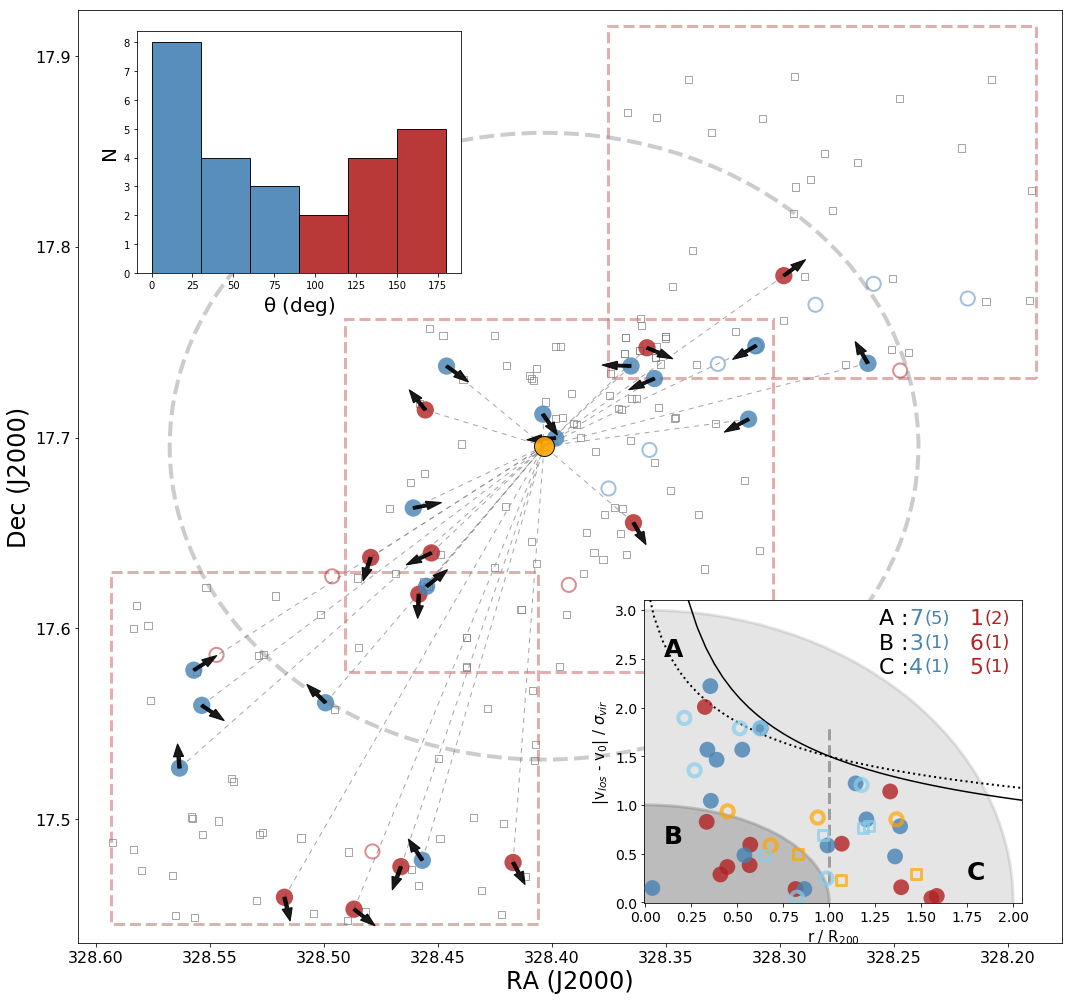

In [516]:
fig, ax = plt.subplots(figsize=(15,14))
# ax.set_facecolor('whitesmoke')
ax.set_xlim(Coords_world_E[0].max() + 0.01, Coords_world_W[0].min() - 0.01)
ax.set_ylim(Coords_world_E[1].min() - 0.01, Coords_world_W[1].max() + 0.01)
plt.xlabel("RA (J2000)", fontsize=24)
plt.ylabel("Dec (J2000)", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Tab_target = Tab_m_HaR

coord_BCG = (328.40351201,17.69544013)

gp_v = Tab_v.groupby("ID", sort=False)
gp_target = Tab_target.groupby("ID", sort=False)

d_centroid_v = gp_v.diff_centroid.median()
d_angle_v = gp_v.diff_angle.median()
d_angle_target = gp_target.diff_angle.median()

plt.scatter(coord_BCG[0], coord_BCG[1], s=400, edgecolor="k", color="orange",alpha=.9,zorder=3)
# plt.scatter(Coords_world[0][edge][::5],Coords_world[1][edge][::5],s=0.02,color="k")
# plt.scatter(Coords_world_W[0][edge][::5],Coords_world_W[1][edge][::5],s=0.02,color="k")
# plt.scatter(Coords_world_E[0][edge][::5],Coords_world_E[1][edge][::5],s=0.02,color="k")

import matplotlib.patches as patches
width = stack_field.shape[1]+48
height = stack_field.shape[0]
cen_C = wcs.all_pix2world(width/2.,height/2.,1)
cen_E = wcs_E.all_pix2world(width/2.,height/2.,1)
cen_W = wcs_W.all_pix2world(width/2.,height/2.,1)

ax3 = fig.add_axes([0.6, 0.1, 0.35, 0.3])
(virial, non_virial, inner, outer)  = draw_phase_diagram(Table=Tab_target, ax=ax3)
plt.plot(rr/R_vir, vv/sigma_v, color="k",lw=2,ls=":")
plt.plot(rr/R_vir, 1.5*(rr/R_vir)**(-0.5),color="k",ls="-")

for cen in [cen_C, cen_E, cen_W]:
    rect = patches.Rectangle((cen[0]-width/2.*0.322/3600, cen[1]-height/2.*0.322/3600), 
                               width*0.322/3600, height*0.322/3600,
                               linewidth=3, ls ="--", edgecolor='indianred',facecolor='none', alpha=0.5, zorder=1)
    ax.add_patch(rect)
         
circle = plt.Circle(coord_BCG, R_vir/len_pix.value*0.322/3600, color='gray', 
                    ls="--", lw=4, alpha=0.4, fill=False, zorder=2)
ax.add_artist(circle)

for num, x, y, pa, theta, offset in zip(pd.unique(Tab_v.ID), gp_v.ra.median(), gp_v.dec.median(), 
                                        gp_v.PA_emission.median(), gp_v.diff_angle.median(), gp_v.diff_centroid.median()):
    if (num in pd.unique(Tab_target.ID)) & (num not in d_angle_target[~(inner|outer)].index):  # galaxies within the circle
        color = "steelblue" if theta<90 else "firebrick"
    #     plt.text(x-60, y-15, "#%s"%num, color="k", fontsize=7, alpha=1.0, zorder=4)
        if offset>1:
            ax.scatter(x, y, s=300, color=color, edgecolors="none", alpha=0.8,zorder=2)
            ax.plot((x,coord_BCG[0]), (y,coord_BCG[1]), color="gray", ls="--", dashes=(5,5),  lw=1., alpha=0.7, zorder=1)
            ax.arrow(x,y,np.sin(pa*np.pi/180)*0.006,np.cos(pa*np.pi/180)*0.006, 
                      color="k", width=0.0015, alpha=0.9, zorder=2)
        elif offset>0.5:
            ax.scatter(x, y, s=200, facecolor='none', linewidth=2, color=color, alpha=0.5, zorder=2)
    else:       
        ax.scatter(x, y, s=50, marker="s", facecolor='none', color="gray", alpha=0.7, zorder=1)

        
ax2 = fig.add_axes([0.13, 0.725, 0.3, 0.24])
b = 7
# ax2.hist(d_angle_v[(d_centroid_v<0.5)&(d_angle_v<90)], bins=np.linspace(0,180,b), color="steelblue",
#          normed=False, histtype="step", linestyle="--", linewidth=2, alpha=0.5)
# ax2.hist(d_angle_v[(d_centroid_v<0.5)&(d_angle_v>90)], bins=np.linspace(0,180,b), color="firebrick",
#          normed=False, histtype="step", linestyle="--", linewidth=2, alpha=0.5)
ax2.hist(d_angle_v[(d_centroid_v>1)&(d_angle_v<90)&(inner|outer)], bins=np.linspace(0,180,b), color="steelblue",
         normed=False, histtype="bar", linewidth=1, edgecolor="k", alpha=0.9)
ax2.hist(d_angle_v[(d_centroid_v>1)&(d_angle_v>90)&(inner|outer)], bins=np.linspace(0,180,b), color="firebrick",
         normed=False, histtype="bar", linewidth=1, edgecolor="k", alpha=0.9)
ax2.plot()

ax2.set_xlabel(r"$\rm \theta$ (deg)",fontsize=20)
ax2.set_ylabel("N",fontsize=20)

plt.tight_layout()
# plt.savefig("/home/qliu/Pictures/A2390_ELG_PA_label_v8-inv2cut2.pdf")
# plt.savefig("/home/qliu/Pictures/Poster/A2390_ELG_PA_label.pdf",transparent=True)

In [405]:
d_angle_v[(d_centroid_v>1)&(d_angle_v>90)&(outer)]

ID
64E      115.097792
86E      166.912967
116E     143.986111
245E     177.860219
286E     152.074980
1371E    166.560314
1267W    169.171129
Name: diff_angle, dtype: float64

In [102]:
gp_A2390 = Tab_n.groupby("ID",sort=False)
Catalog_A2390 = gp_A2390.median()
Catalog_A2390.insert(loc=13, column='IQR_angle', 
                     value=gp_A2390.diff_angle.quantile(0.75)-gp_A2390.diff_angle.quantile(0.25))
Catalog_A2390.to_csv("./Catalog_A2390_0503.txt", sep=" ", float_format='%.4f')

## Phase Diagram Analysis

In [261]:
def centroid_offset_phase_diagram(Table, r1=1., v1=1., r2=2., v2 = 3., z0=0.228, ax=None):
    Tab = Table.groupby("ID", sort=False)   
    
    R_norm = Tab.dist_cen.median()*l  # normed R in R200
    v_norm = abs(Tab.redshift.median()-z0)*3e5/v_vir # normed R in v_vir (sigma_vir)
    mag = Tab.mag_auto.median()
    
    d_centroid_v = Tab.diff_centroid.median()
    d_angle_v = Tab.diff_angle.median()
    
    circle = (((R_norm/r2)**2 + (v_norm/v2)**2) < 1.)  #circle
    sigma_v = Sigma_vir(R_vir=2.*u.Mpc, M_vir=2e15*c.M_sun)
    vv = V_esc(R_norm*R_vir*u.Mpc, R_vir=2.*u.Mpc, M_vir=2e15*c.M_sun, C=6)
    in_cluster = ((v_norm/v1) < (vv/sigma_v).value)
    out_cluster = ((v_norm/v1) > (vv/sigma_v).value) & circle
    
    cond =  (d_centroid_v>1) & circle#& in_cluster
    condb =  (d_centroid_v>0.5)&(d_centroid_v<1) & circle#& in_cluster
    condc =  (d_centroid_v>0)&(d_centroid_v<.5) & circle#& in_cluster
    
    from matplotlib.patches import Ellipse
    if ax is None:
        plt.figure(figsize=(11,9))
        ax = plt.subplot(111)
    plt.scatter(R_norm[cond], v_norm[cond], s=200, color="green",
                edgecolor="none", alpha=0.8, zorder=3,label="d > 1")
    plt.scatter(R_norm[condb], v_norm[condb], s=150, color="lightgreen", 
                edgecolor="none", lw=3, alpha=0.7, zorder=4,label="0.5 < d < 1")
    plt.scatter(R_norm[condc], v_norm[condc], marker="s",s=120, color="darkseagreen",
                facecolor="none", lw=2, alpha=0.7, zorder=4,label="d < 0.5")
    
    non_virial = (((R_norm/r1)**2 + (v_norm/v1)**2) > 1.) & (((R_norm/r2)**2 + (v_norm/v2)**2) < 1.)
    virial = (((R_norm/r1)**2 + (v_norm/v1)**2) < 1.)
    inner = ((R_norm/r1)**2 < 1.) & in_cluster
    outer = ((R_norm/r1)**2 > 1.) &  in_cluster   
    
    condA = non_virial & inner
    condB = virial  
    condC = non_virial & outer   


    ellipse1 = Ellipse(xy=(0,0), width=2*r1, height=2*v1, 
                      edgecolor='firebrick', fc='none', lw=3, alpha=0.7,zorder=2)
    ellipse2 = Ellipse(xy=(0,0), width=2*r2, height=2*v2, 
                      edgecolor='gray', fc='none', lw=3, alpha=0.7,zorder=2)
    ax.add_patch(ellipse1)
    ax.add_patch(ellipse2)
    plt.vlines(1, ymin=0.2, ymax=1.8,color="gray",linestyle="--", alpha=0.7, lw=3)

    plt.xlim(-0.005, r2+0.05)
    plt.ylim(-0.005, v2+0.1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("r / R$_{200}$",fontsize=15)
    plt.ylabel("|v$_{los}$ - v$_0$| / $\sigma_{vir}$",fontsize=15)
    plt.legend(loc=1,fontsize=14)
    plt.tight_layout()
    return (virial, non_virial, inner, outer)

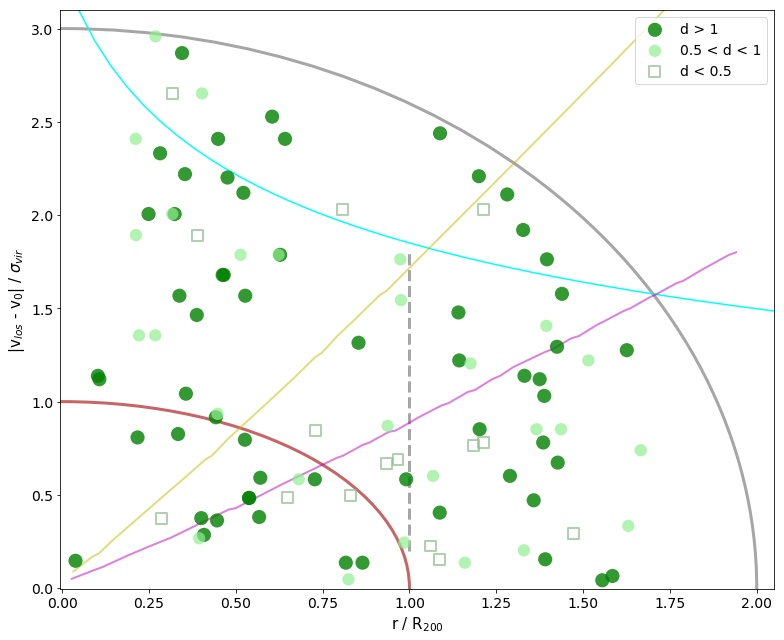

In [401]:
# weight new CC
(virial, non_virial, inner, outer) = centroid_offset_phase_diagram(Table=Tab_m_all)
vv = V_esc(rr, R_vir=2.*u.Mpc, M_vir=2e15*c.M_sun, C=6)
sigma_v = Sigma_vir(R_vir=2.*u.Mpc, M_vir=2e15*c.M_sun)
plt.plot(rr/R_vir, vv/sigma_v, c="cyan",ls="-") # Rhee 2017

import pandas as pd
df = pd.read_csv("/home/qliu/Downloads/Jaffe2018a.csv",header=None)  #Jaffe2018
r_Jafa, v_Jafa = df.iloc[:,0], df.iloc[:,1]
plt.plot(r_Jafa, v_Jafa, color="y", lw=2,ls="-",alpha=0.5,label="High M")
df = pd.read_csv("/home/qliu/Downloads/Jaffe2018b.csv",header=None)  #Jaffe2018
r_Jafb, v_Jafb = df.iloc[:,0], df.iloc[:,1]
plt.plot(r_Jafb, v_Jafb, color="m", lw=2,ls="-",alpha=0.5,label="Low M")

## A2465

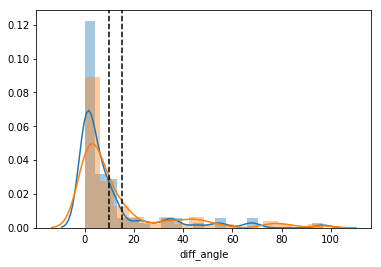

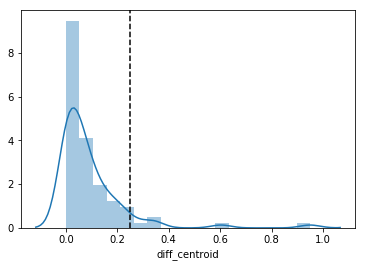

In [524]:
df2_all = pd.DataFrame({})
for i in range(10):
    df2 = pd.read_csv("./A2465C/centroid_catalog/centroid_analysis_A2465C_m2aper_all_weight_med_v8.%d.csv"%(i+1))
    df2_all = pd.concat([df2_all, df2])
df2_all.ID = df2_all.ID.astype("str")+"D"

Tab_v_2 = df2_all[(df2_all.type=='v')]
Tab_v_2 = Tab_v_2[abs(Tab_v_2.redshift-0.245)<0.015] 
cond =  (Tab_v_2.mag_auto<25) & (Tab_v_2.mag_auto>16) \
        & (~np.isnan(Tab_v_2.diff_centroid)) & (Tab_v_2.dist_edge>20) \
        &(np.log10(Tab_v_2.SNR_Ha/Tab_v_2.SNR_OII)>-0.0) & (Tab_v_2.R_Ha<7) 

Tab_m_2 = Tab_v_2[cond]
Tab_c_2 = df2_all[(df2_all.type=='c')]
d_centroid_c_2 = Tab_c_2.sample(frac=0.1).diff_angle

gp_2 = Tab_m_2.groupby("ID", sort=False)
d_angles_v_2 = gp_2.diff_angle
interval_angle_2 = d_angles_v_2.quantile(0.75)-d_angles_v_2.quantile(0.25)
sigma_angle_2 = d_angles_v_2.quantile(0.84)-d_angles_v_2.quantile(0.16)
stddev_angle_2 = d_angles_v_2.std()

d_centroids_v_2 = gp_2.diff_centroid
interval_offset_2 = d_centroids_v_2.quantile(0.75)-d_centroids_v_2.quantile(0.25)

sns.distplot(interval_angle_2)
sns.distplot(sigma_angle_2)
plt.axvline(10, ls="--", color="k")
plt.axvline(15, ls="--", color="k")
plt.show()
sns.distplot(interval_offset_2)
plt.axvline(0.25, ls="--", color="k")

# rob_cond_2 = ~np.isnan(stddev_angle_2) &(interval_angle_2<10) #&(interval_offset_2<0.25)
rob_cond_2 = ~np.isnan(stddev_angle_2) & (sigma_angle_2<10) # &(interval_angle_2<10) #&(interval_offset_2<0.25)

for id in interval_angle_2.keys()[~rob_cond_2]:
    Tab_m_2 = Tab_m_2[Tab_m_2.ID!=id]
    
Tab_2 = Tab_m_2.groupby("ID", sort=False)

d_centroid_v_2 = Tab_2.diff_centroid.median()

d_angle_v_2 = Tab_2.diff_angle.median()


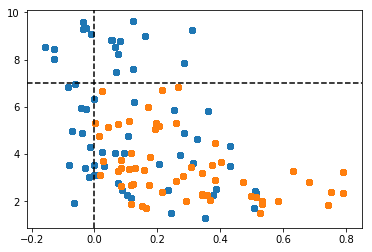

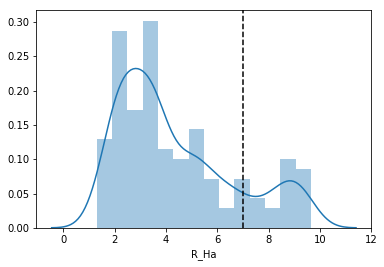

In [35]:
plt.scatter((Tab_v_2.SNR_Ha-Tab_v_2.SNR_OII)/Tab_v_2.SNR_Ha,Tab_v_2.R_Ha)
plt.scatter((Tab_m_2.SNR_Ha-Tab_m_2.SNR_OII)/Tab_m_2.SNR_Ha,Tab_m_2.R_Ha)
plt.axhline(7, ls="--", color="k")
plt.axvline(0, ls="--", color="k")
plt.show()
sns.distplot(Tab_v_2.R_Ha)
plt.axvline(7, ls="--", color="k")

# of offset > 50 pix :41
# of offset > 100 pix :22


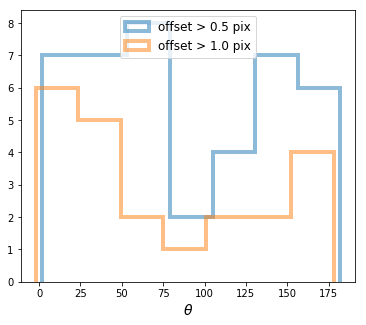

In [144]:
# M2 APER MED weight
plt.figure(figsize=(6,5))
draw_angle_candidate(d_angle_v_2, d_centroid_v_2,crit=[0.5, 1], b=8)

In [520]:
Z_bound = fits.getdata('./A2465C/A2465C_bound_v2.fits').astype("int")
hdu_field = fits.open("/home/qliu/data/A2465/A2465C_deep.fits")[0]
wcs_D = WCS(hdu_field.header)
stack_field = hdu_field.data
yy,xx = np.indices(stack_field.shape)+1

Coords_world_D = wcs_D.all_pix2world(pos_image[0].ravel(), pos_image[1].ravel(), 1)

In [518]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
distance_cluster = cosmo.angular_diameter_distance(z=0.245)
print(distance_cluster)
len_1arc = distance_cluster*u.arcsec.to(u.rad)
len_pix = len_1arc * 0.322

velocity_dispersion = 740 * u.km/u.s
v_vir = velocity_dispersion.value
# v_vir_los = v_vir/np.sqrt(3) # los vel dispersion
R_vir = 1.2  # Mpc
l = len_pix.value/R_vir # 1 pix = l R_vir

len_pix

794.562953587183 Mpc


<Quantity 0.00124039 Mpc>

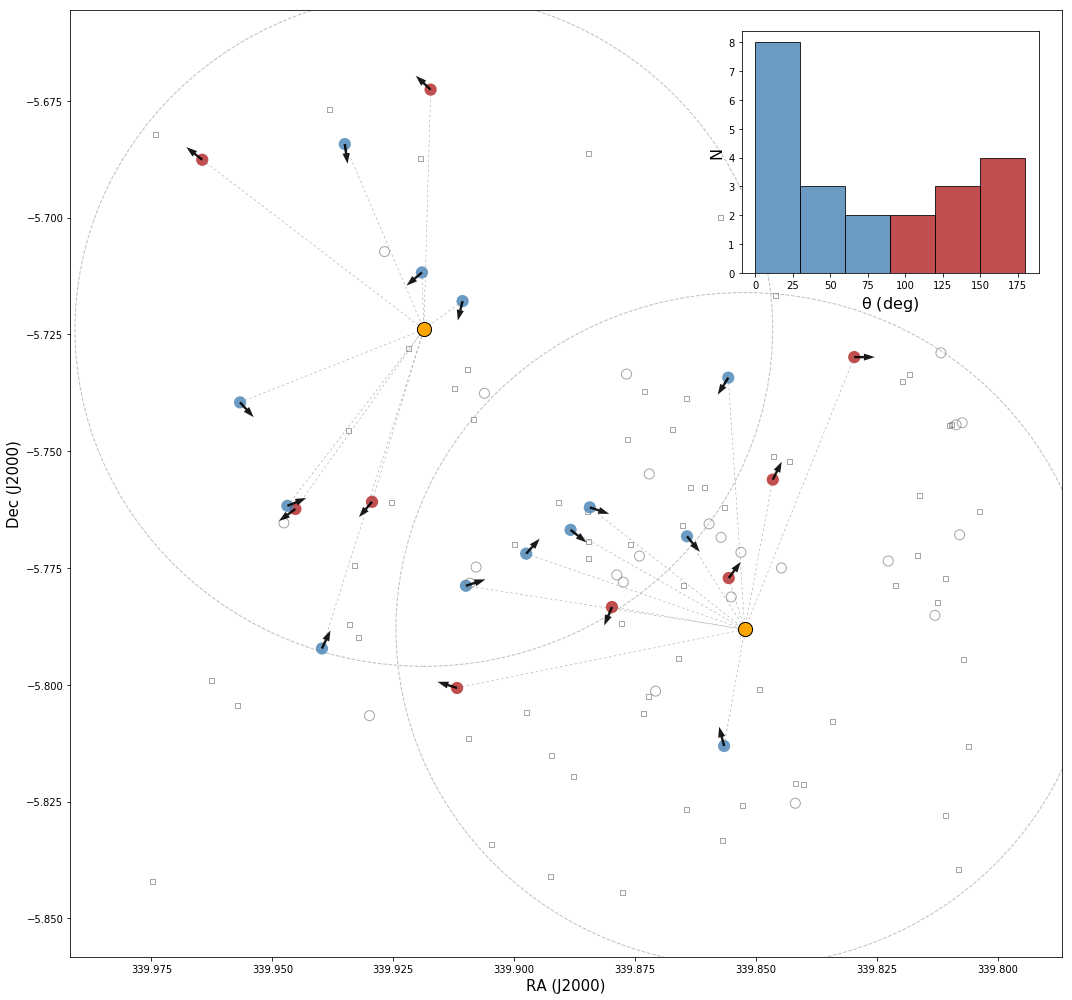

In [40]:
fig, ax = plt.subplots(figsize=(15,14))

ax.set_xlim(Coords_world[0].max() + 0.01, Coords_world[0].min() - 0.01)
ax.set_ylim(Coords_world[1].min() - 0.01, Coords_world[1].max() + 0.01)
plt.xlabel("RA (J2000)", fontsize=15)
plt.ylabel("Dec (J2000)", fontsize=15)

coord_BCG = ((339.91869588, -5.72394458), (339.85233922, -5.78816229))

gp_2 = Tab_v_2.groupby("ID", sort=False)
gp_m2 = Tab_ma.groupby("ID", sort=False)

## Our sample
# X, Y = wcs.all_world2pix(Tab_2.ra.median(), Tab_2.dec.median(), 1)
# pos_BCG = wcs.all_world2pix([339.91869588, 339.85233922], [-5.72394458, -5.78816229], 1)

for i in [0,1]:
    plt.scatter(coord_BCG[i][0],coord_BCG[i][1], s=200, edgecolor="k", color="orange", alpha=1,zorder=3)
    circle = plt.Circle(coord_BCG[i], 1./len_pix.value*0.322/3600, color='gray', ls="--", lw=1., alpha=0.5, fill=False)
    #0.6 Mpc
    ax.add_artist(circle)
    
for num, ra, dec, pa, theta, offset in zip(pd.unique(Tab_v_2.ID), gp_2.ra.median(), gp_2.dec.median(), 
                                        gp_2.PA_emission.median(), gp_2.diff_angle.median(), gp_2.diff_centroid.median()):
    if num in pd.unique(Tab_m_2.ID):
        color = "steelblue" if theta<90 else "firebrick"
    #     plt.text(x-60, y-15, "#%s"%num, color="k", fontsize=7, alpha=1.0, zorder=4)
        if offset>1:
            plt.scatter(ra, dec, s=150, color=color, edgecolors="none", alpha=0.8,zorder=2)
            x, y = wcs.all_world2pix(ra, dec, 1)
            member = Z_bound[np.int(y), np.int(x)] - 1
            plt.plot((ra,coord_BCG[member][0]), (dec,coord_BCG[member][1]), color="gray", ls="--", dashes=(5,5),  lw=.5, alpha=0.8, zorder=2)
            plt.arrow(ra,dec,np.sin(pa*np.pi/180)*0.002,np.cos(pa*np.pi/180)*0.002, 
                      color="k", width=0.0005, lw=0.001, alpha=0.9, zorder=2)
        else:
            plt.scatter(ra, dec, s=100, facecolor='none', color="gray", alpha=0.7, zorder=2)
    else:       
        plt.scatter(ra, dec, s=25, marker="s", facecolor='none', color="gray", alpha=0.7, zorder=1)
        
ax2 = fig.add_axes([0.69, 0.725, 0.275, 0.24])
b = 7
ax2.hist(d_angle_v_2[(d_centroid_v_2>1)&(d_angle_v_2<90)], bins=np.linspace(0,180,b), color="steelblue",
         normed=False, histtype="bar", linewidth=1, edgecolor="k", alpha=0.8)
ax2.hist(d_angle_v_2[(d_centroid_v_2>1)&(d_angle_v_2>90)], bins=np.linspace(0,180,b), color="firebrick",
         normed=False, histtype="bar", linewidth=1, edgecolor="k", alpha=0.8)
ax2.set_xlabel(r"$\rm \theta$ (deg)",fontsize=16)
ax2.set_ylabel("N",fontsize=16)

plt.tight_layout()
plt.savefig("/home/qliu/Pictures/A2465C_ELG_PA_label_v2.pdf")

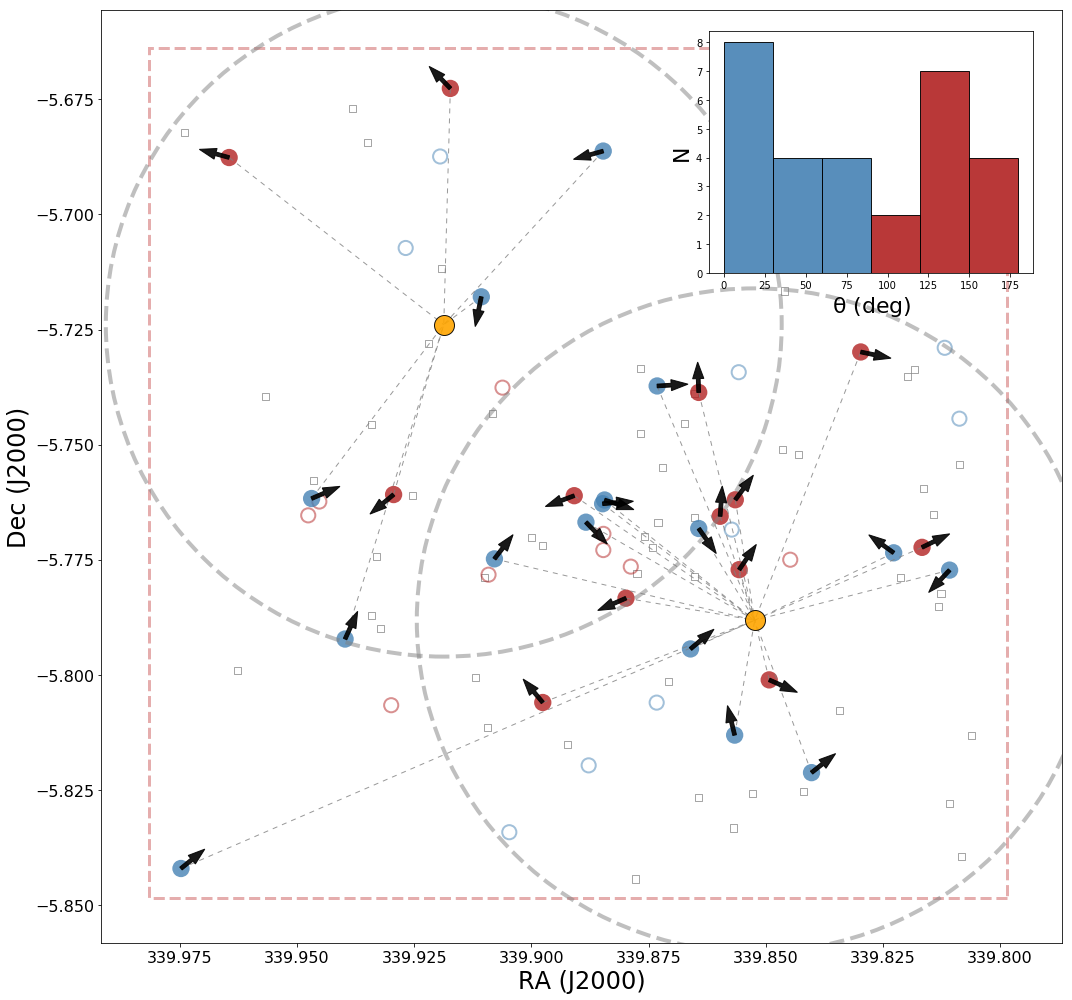

In [527]:
# weight
fig, ax = plt.subplots(figsize=(15,14))

ax.set_xlim(Coords_world_D[0].max() + 0.01, Coords_world_D[0].min() - 0.01)
ax.set_ylim(Coords_world_D[1].min() - 0.01, Coords_world_D[1].max() + 0.01)
plt.xlabel("RA (J2000)", fontsize=24)
plt.ylabel("Dec (J2000)", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

coord_BCG = ((339.91869588, -5.72394458), (339.85233922, -5.78816229))

gp_2 = Tab_v_2.groupby("ID", sort=False)

import matplotlib.patches as patches
width = stack_field.shape[1]
height = stack_field.shape[0]
cen_D = wcs_D.all_pix2world(width/2.,height/2.,1)
rect = patches.Rectangle((cen_D[0]-width/2.*0.322/3600, cen_D[1]-height/2.*0.322/3600), 
                           width*0.322/3600, height*0.322/3600,
                           linewidth=3, ls ="--", edgecolor='indianred',facecolor='none', alpha=0.5, zorder=1)
ax.add_patch(rect)

for i in [0,1]:
    plt.scatter(coord_BCG[i][0],coord_BCG[i][1], s=400, edgecolor="k", color="orange", alpha=.9,zorder=3)
    circle = plt.Circle(coord_BCG[i], 1./len_pix.value*0.322/3600, color='gray', 
                        ls="--", lw=4, alpha=0.5, fill=False, zorder=2)
    #0.6 Mpc
    ax.add_artist(circle)
    
for num, ra, dec, pa, theta, offset in zip(pd.unique(Tab_v_2.ID), gp_2.ra.median(), gp_2.dec.median(), 
                                        gp_2.PA_emission.median(), gp_2.diff_angle.median(), gp_2.diff_centroid.median()):
    if num in pd.unique(Tab_m_2.ID):
        color = "steelblue" if theta<90 else "firebrick"
    #     plt.text(x-60, y-15, "#%s"%num, color="k", fontsize=7, alpha=1.0, zorder=4)
        if offset>1:
            plt.scatter(ra, dec, s=300, color=color, edgecolors="none", alpha=0.8,zorder=2)
            x, y = wcs_D.all_world2pix(ra, dec, 1)
            member = Z_bound[np.int(y), np.int(x)] - 1
            plt.plot((ra,coord_BCG[member][0]), (dec,coord_BCG[member][1]), color="gray", ls="--", dashes=(5,5),  lw=1., alpha=0.8, zorder=2)
            plt.arrow(ra,dec,np.sin(pa*np.pi/180)*0.003,np.cos(pa*np.pi/180)*0.003, 
                      color="k", width=0.0008, alpha=0.9, zorder=2)
        elif offset>0.5:
            plt.scatter(ra, dec, s=200, facecolor='none', color=color, lw=2,alpha=0.5, zorder=2)
    else:       
        plt.scatter(ra, dec, s=50, marker="s", facecolor='none', color="gray", alpha=0.7, zorder=1)
        
ax2 = fig.add_axes([0.66, 0.725, 0.3, 0.24])
b = 7
# ax2.hist(d_angle_v_2[(d_centroid_v_2>.5)&(d_angle_v_2<90)], bins=np.linspace(0,180,b), color="steelblue",
#          normed=False, histtype="bar", linewidth=1, edgecolor="k", alpha=0.5)
# ax2.hist(d_angle_v_2[(d_centroid_v_2>.5)&(d_angle_v_2>90)], bins=np.linspace(0,180,b), color="firebrick",
#          normed=False, histtype="bar", linewidth=1, edgecolor="k", alpha=0.5)
ax2.hist(d_angle_v_2[(d_centroid_v_2>1)&(d_angle_v_2<90)], bins=np.linspace(0,180,b), color="steelblue",
         normed=False, histtype="bar", linewidth=1, edgecolor="k", alpha=0.9)
ax2.hist(d_angle_v_2[(d_centroid_v_2>1)&(d_angle_v_2>90)], bins=np.linspace(0,180,b), color="firebrick",
         normed=False, histtype="bar", linewidth=1, edgecolor="k", alpha=0.9)
ax2.set_xlabel(r"$\rm \theta$ (deg)",fontsize=22)
ax2.set_ylabel("N",fontsize=22)

plt.tight_layout()
# plt.savefig("/home/qliu/Pictures/report/A2465C_ELG_PA_label_v6.pdf")
# plt.savefig("/home/qliu/Pictures/Poster/A2465C_ELG_PA_label.pdf")

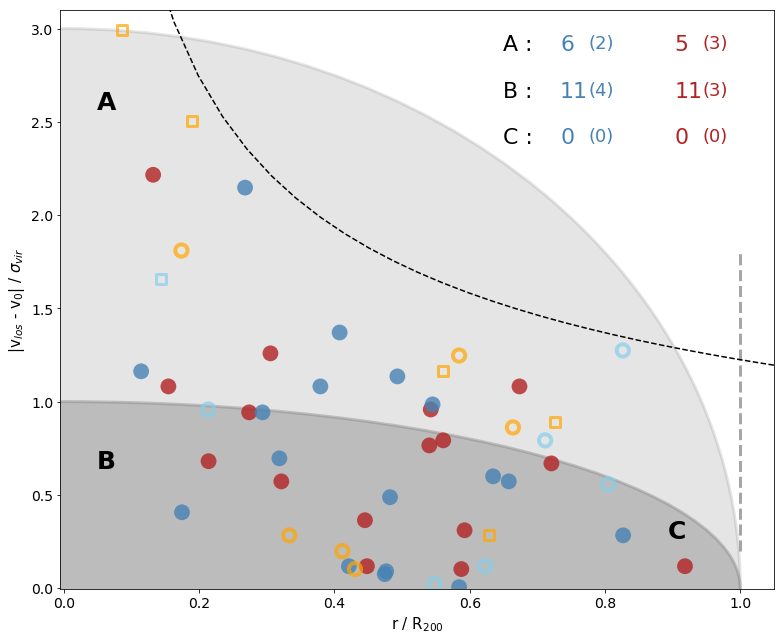

In [533]:
(virial, non_virial, inner, outer) = draw_phase_diagram(Table=Tab_m_2, r1=1., r2=1., v1=1., v2 = 3.,  z0=0.245)
plt.plot(R_grid/R_vir, np.sqrt(1.5)*(R_grid/R_vir)**(-0.5),color="k",ls="--")

In [107]:
gp_A2465 = Tab_v_2.groupby("ID",sort=False)
Catalog_A2465 = gp_A2465.median()
Catalog_A2465.insert(loc=13, column='IQR_angle', 
                     value=gp_A2465.diff_angle.quantile(0.75)-gp_A2465.diff_angle.quantile(0.25))
Catalog_A2465.to_csv("./Catalog_A2465_0503.txt", sep=" ", float_format='%.4f')

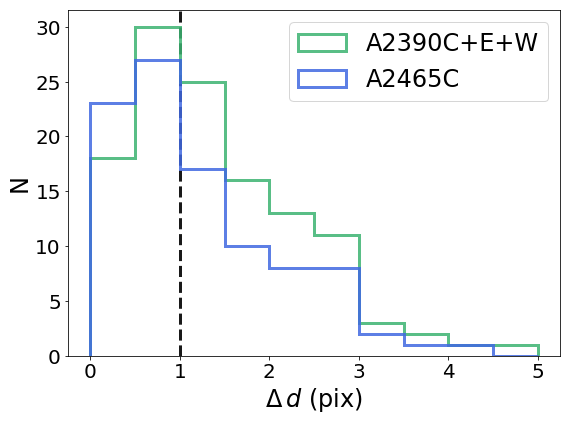

In [308]:
with plt.rc_context({'xtick.color':'k', 'ytick.color':'k', 
                     'axes.labelcolor':'k','axes.edgecolor':"k"}):
    plt.figure(figsize=(8,6))
#     gp_m = Tab_m.groupby("ID", sort=False)
    gp_n = Tab_m.groupby("ID", sort=False)
    d_centroids_v = gp_n.diff_centroid.median()
    plt.hist(d_centroids_v[d_centroids_v>0], bins=np.linspace(0,5,11),color="mediumseagreen",
             histtype="step",label="A2390C+E+W",lw=3,alpha=0.85,zorder=2)
    gp_2 = Tab_v_2.groupby("ID", sort=False)
    d_centroids_v2 = gp_2.diff_centroid.median()
    plt.hist(d_centroids_v2[d_centroids_v2>0], bins=np.linspace(0,5,11),color="royalblue",
             histtype="step",label="A2465C",lw=3,alpha=0.85,zorder=2)
    plt.axvline(1.0,ls="--",color="k",lw=3,alpha=0.9,zorder=1)
    plt.xlabel("$\Delta\,d$ (pix)", fontsize=24)
    plt.ylabel("N", fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=24)
    plt.subplots_adjust(top=0.95,bottom=0.15,left=0.12,right=0.975)
    # plt.savefig("/home/qliu/Pictures/report/Centroid_dist.pdf")
#     plt.savefig("/home/qliu/Pictures/Poster/Centroid_dist.pdf",transparent=True)

In [291]:
d_centroids_v[d_centroids_v>3]

ID
965C     3.687998
1479C    4.512723
1500C    3.153708
928C     3.251417
66E      4.336130
170E     5.629199
923W     3.700155
1319W    3.354858
Name: diff_centroid, dtype: float64